In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from mpl_toolkits.mplot3d import axes3d

$$ I = \int \int \int e^{\sqrt{x^{2}+y^{2}+z^{2}}}  dx dy dz = 4\pi(e-2) $$

$$ \{x^{2}+y^{2}+z^{2} \le 1 \} $$

$$ r,\theta,\phi  $$

$$ v = r^{3} $$

$$ r = v^{1/3} $$  

In [52]:
def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform( 0., 2*np.pi )
        
        costheta = np.random.uniform( -1, 1)
        theta = np.arccos(costheta)
        
        #theta = np.random.uniform( 0., np.pi )
        
        
        u = np.random.rand()
        
        r = R*u**(1./3.)
        
        X = np.append( X, r*np.cos(phi)*np.sin(theta) )
        Y = np.append( Y, r*np.sin(phi)*np.sin(theta) )
        Z = np.append( Z, r*np.cos(theta) )
        
    return X,Y,Z

In [53]:
Radio = 1.0
Npoints = 10000
data_sphere = CreateSphere(Npoints,Radio)
data_sphere = np.array(data_sphere)

#print(data_sphere)

<IPython.core.display.Javascript object>


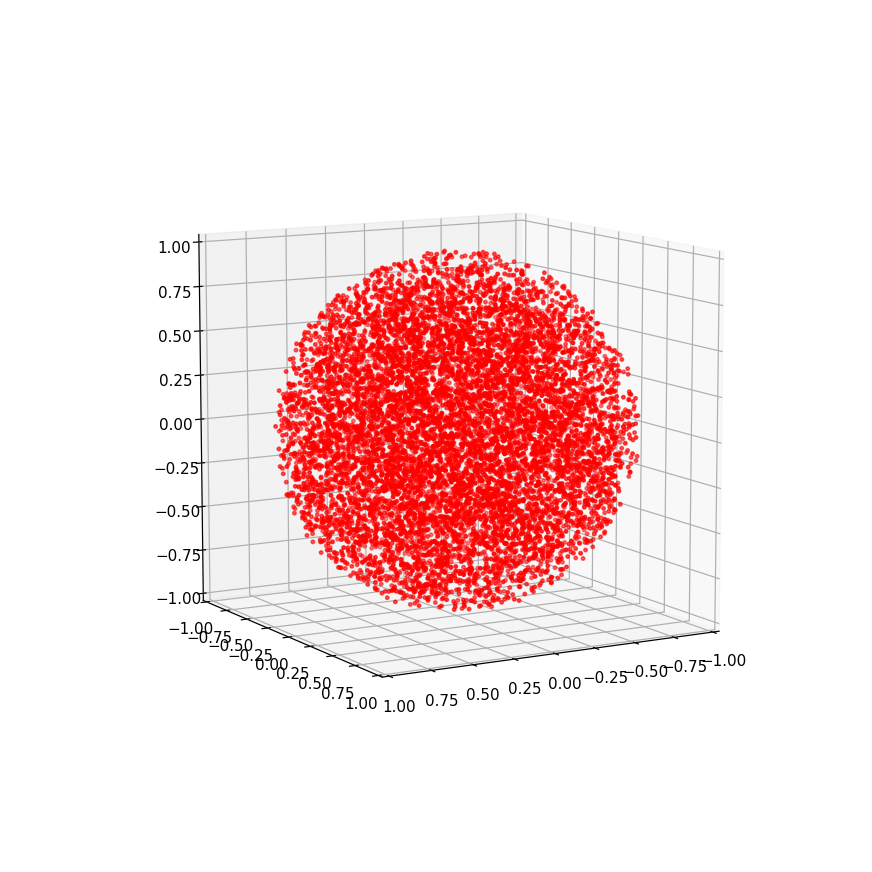

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-Radio, Radio)
ax.set_ylim3d(-Radio, Radio)
ax.set_zlim3d(-Radio, Radio)

ax.view_init(10,60)
ax.scatter(data_sphere[0],data_sphere[1],data_sphere[2], color='r',marker='.')

In [55]:
def func(x,y,z):
    return np.exp( np.sqrt(x**2+y**2+z**2) )

In [59]:
def MCIntegral(data,Npoints,R):
    
    integral = 0.
    
    for i in range(Npoints):
        
        integral += func( data[0][i], data[1][i], data[2][i] )
        
    volumen = (4*np.pi)*R**3/3.    # Volumen de normalizacion
        
    integral *= volumen/Npoints
    
    return integral

In [60]:
integral = MCIntegral(data_sphere,Npoints,Radio)

In [61]:
print(integral, 4*np.pi*(np.exp(1)-2))

9.063700429111647 9.02619566197592


In [62]:
def Funcr(r):
    return np.exp(r)

In [65]:
def GetIntegral(Npoints, R):
    
    Sample = []
    
    for i in range(Npoints):
        
        u = np.random.rand()
        r = R*u**(1./3.)
        
        Sample.append(Funcr(r))
        
    integral = np.average(Sample)
    
    volumen = (4*np.pi)*R**3/3.    # Volumen de normalizacion
    
    integral *= volumen
    
    return integral

In [67]:
print(GetIntegral(1000000, Radio))

9.026557716670869
